Objectiv : Analyse the data from Kaggle

# Kaggle description

Context

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?
Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

* Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.


# Import libraries

In [1]:
#data manipulation 
import pandas as pd
import os

#data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Create functions

In [2]:
#create a data cleaning function
def data_cleaning(
    Airlines:pd.DataFrame
              )->pd.DataFrame:
    Airlines['Gender'] = Airlines['Gender'].astype('category')
    Airlines['Type of Travel'] = Airlines['Type of Travel'].astype('category')
    Airlines['Customer Type'] = Airlines['Customer Type'].astype('category')
    Airlines['Class'] = Airlines['Class'].astype('category')
    Airlines['satisfaction'] = Airlines['satisfaction'].astype('category')
    Airlines.drop("Unnamed: 0", axis =1, inplace= True)
    return Airlines.info()#call the cleaning function 

# Import Data

In [3]:
df_train = pd.read_csv("data/train.csv")

## First look

In [4]:
df_train.shape

(103904, 25)

In [5]:
df_train.head(15)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

After a first look of the data, we need to deep dive, finding missing values and some statistics

In [7]:
df_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Clean data and create new values

In [9]:
data_cleaning(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  int64   
 1   Gender                             103904 non-null  category
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  int64   
 7   Inflight wifi service              103904 non-null  int64   
 8   Departure/Arrival time convenient  103904 non-null  int64   
 9   Ease of Online booking             103904 non-null  int64   
 10  Gate location                      103904 non-null  int64   
 11  Food and drink            

In [10]:
#create a new variable : over_all rating 
df_train['overall_rating'] = round((df_train['Inflight wifi service']+ df_train['Departure/Arrival time convenient'] +
df_train['Ease of Online booking'] + df_train['Gate location'] + df_train['Food and drink']+ df_train['Online boarding'] + 
df_train['Seat comfort'] + df_train['Inflight entertainment'] + df_train['On-board service'] + df_train['Leg room service'] + 
df_train['Baggage handling'] + df_train['Checkin service'] + df_train['Inflight service'] + df_train['Cleanliness'])/14,1)
#create a new variable : total delay 
df_train['Total_Delay'] = (df_train['Departure Delay in Minutes']+ 
                                    df_train['Arrival Delay in Minutes'])
#inspect the data frame again to check the new columns
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating,Total_Delay
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,3.9,43.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,2.3,7.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,3.7,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,3.0,20.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,3.5,0.0


# Make graphs
Looking distribution of the variables

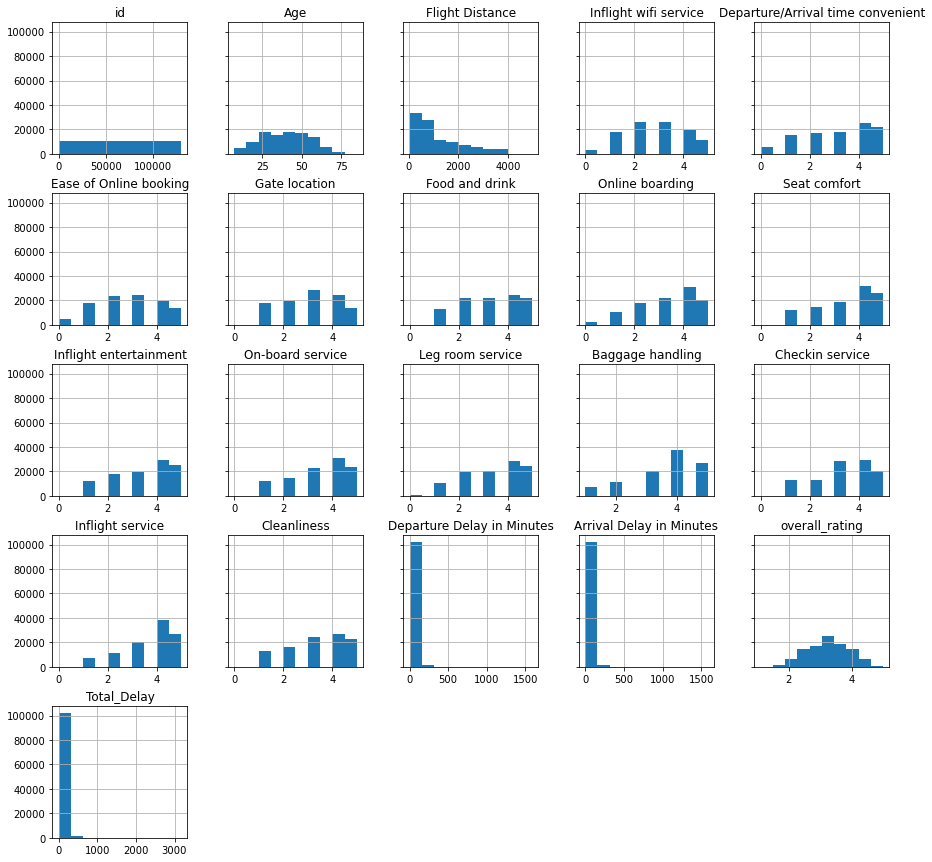

In [11]:
numeric_variables = list(df_train.select_dtypes(include=['int64', 'float64'])) #select the numeric variables

df_train[numeric_variables].describe().apply(lambda x:round(x,2)).T  #apply describe method

histograms = df_train[numeric_variables].hist(bins =10, 
                                              xlabelsize=10, 
                                              ylabelsize=10, 
                                              grid=True, 
                                              sharey= True, figsize = (15,15))
#create the histograms

After watching the above graphs, we saw that the scale for Departure Delay, Arrival Delay and Total_Delay is very large, so :
# Looking for outliers
After ploting the data, we need to look for outliers and maybe remove them from our dataset.

In [32]:
worst_delayH = round(df_train["Total_Delay"].max()/60,2)
print("The worst delay was : {} hours".format(worst_delayH))

The worst delay was : 52.93 hours


In [35]:
# The worst flight in the data
# getting a better view of it
df_train.loc[df_train["Total_Delay"] == df_train["Total_Delay"].max()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating,Total_Delay
83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,...,4,4,2,3,2,1592,1584.0,neutral or dissatisfied,2.7,3176.0


# Seeking for more outliers

In [31]:
df_train.nlargest(10, "Total_Delay")

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,overall_rating,Total_Delay
83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,...,4,4,2,3,2,1592,1584.0,neutral or dissatisfied,2.7,3176.0
6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,...,5,4,5,3,5,1305,1280.0,satisfied,3.7,2585.0
61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,1,...,4,5,4,4,4,1017,1011.0,satisfied,3.2,2028.0
72206,78300,Male,Loyal Customer,30,Personal Travel,Eco,1598,1,4,1,...,4,4,1,4,1,978,970.0,neutral or dissatisfied,2.4,1948.0
61287,4376,Female,Loyal Customer,53,Business travel,Business,2418,3,4,4,...,2,2,3,4,3,930,952.0,neutral or dissatisfied,3.3,1882.0
80182,8345,Male,Loyal Customer,47,Business travel,Business,2187,4,5,4,...,5,5,4,4,4,933,920.0,satisfied,4.3,1853.0
61528,83676,Male,disloyal Customer,43,Business travel,Business,577,3,3,3,...,5,5,5,3,5,921,924.0,neutral or dissatisfied,4.0,1845.0
27732,69504,Male,Loyal Customer,27,Business travel,Business,1746,1,1,4,...,5,4,5,4,5,859,860.0,satisfied,3.6,1719.0
51860,79912,Male,Loyal Customer,15,Business travel,Business,3979,2,2,2,...,4,3,2,3,2,853,823.0,neutral or dissatisfied,2.3,1676.0
37096,78292,Male,Loyal Customer,23,Business travel,Eco,998,5,2,2,...,2,4,5,1,5,750,729.0,satisfied,3.2,1479.0


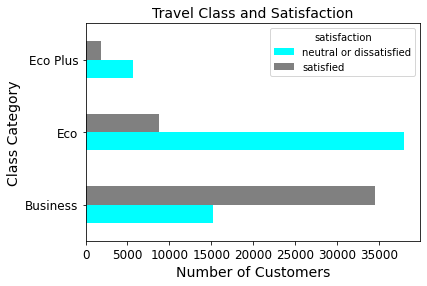

In [14]:
#First Visual: Satisfaction and Class Category 

by_cat_class = df_train.groupby(['Class', 'satisfaction']) 

ax = by_cat_class.size().unstack().plot(kind='barh', color = ['aqua', 'grey']) 

#unstack and plot 
ax.set_title('Travel Class and Satisfaction', size =14) #title 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('Number of Customers', fontsize = 14) #set the x_label 
ax.set_ylabel('Class Category', fontsize = 14); #set the y_label

In [15]:
df_train["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [16]:
by_cat_class.size()

Class     satisfaction           
Business  neutral or dissatisfied    15185
          satisfied                  34480
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
dtype: int64

In [17]:
df_train["overall_rating"].loc[df_train["satisfaction"] == "neutral or dissatisfied"].value_counts()

2.9    5519
3.1    5519
2.6    4703
3.4    4403
2.4    3858
3.6    3261
2.8    2747
3.0    2667
3.2    2644
2.7    2616
3.3    2402
2.5    2257
2.1    2112
3.5    1942
3.9    1752
2.3    1564
2.2    1395
3.7    1289
3.8    1123
1.9    1107
4.1     836
2.0     779
4.0     604
1.8     368
1.6     336
1.7     309
4.2     237
4.3     157
4.4     152
1.4      80
1.5      66
4.5      36
4.6      19
1.3       9
1.2       8
1.1       3
Name: overall_rating, dtype: int64

<AxesSubplot:xlabel='overall_rating'>

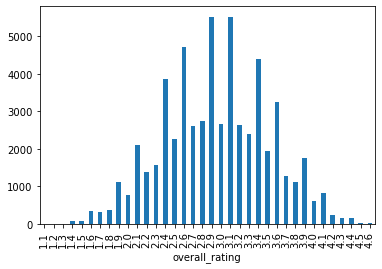

In [18]:
df_train.loc[df_train['satisfaction'] == "neutral or dissatisfied"].groupby(['overall_rating']).size().plot(kind='bar')

<AxesSubplot:xlabel='overall_rating'>

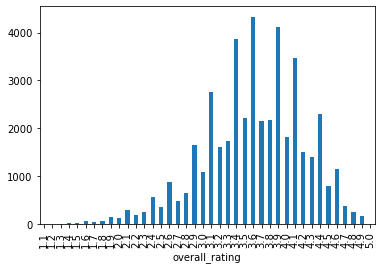

In [19]:
df_train.loc[df_train['satisfaction'] == "satisfied"].groupby(['overall_rating']).size().plot(kind='bar') 

<AxesSubplot:xlabel='Inflight wifi service'>

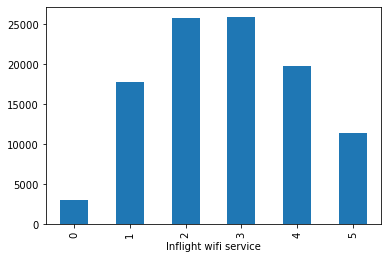

In [20]:
df_train.groupby(['Inflight wifi service']).size().plot(kind='bar') 

<AxesSubplot:xlabel='satisfaction'>

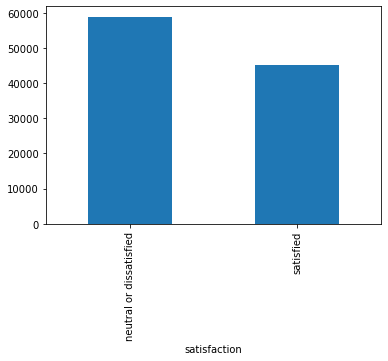

In [21]:
df_train.groupby(['satisfaction']).size().plot(kind='bar') 

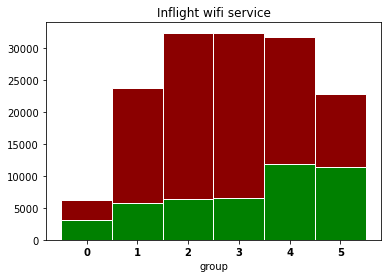

In [22]:
# Names of group and bar width
names = ['0','1','2','3','4', '5']
r = names
bars1 = df_train.loc[df_train['satisfaction'] == "satisfied"].groupby(['Inflight wifi service']).size()
bars2 = df_train.groupby(['Inflight wifi service']).size()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='green', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='darkred', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.title("Inflight wifi service")
 
# Show graphic
plt.show()

# Look on satisfaction colums

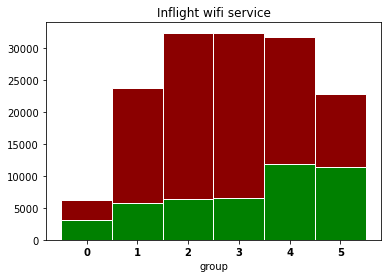

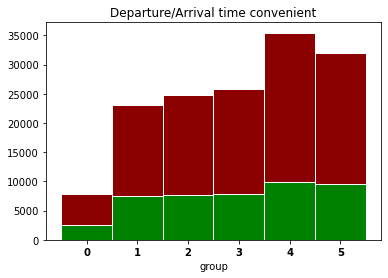

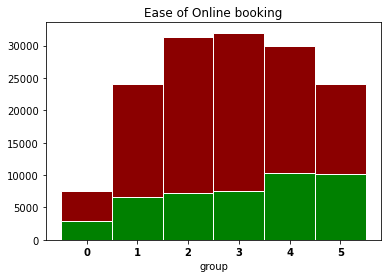

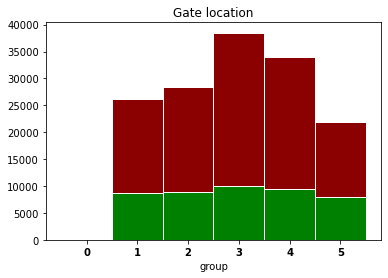

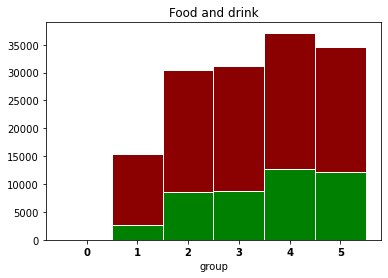

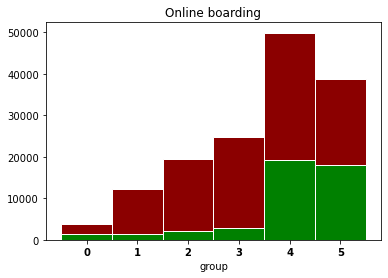

ValueError: shape mismatch: objects cannot be broadcast to a single shape

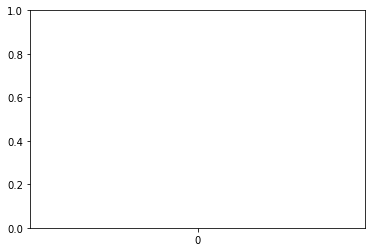

In [23]:
COL_SAT = ["Inflight wifi service",
           "Departure/Arrival time convenient",
           "Ease of Online booking",
           "Gate location",
           "Food and drink",
           "Online boarding",
           "Seat comfort",
           "Inflight entertainment",
           "On-board service",
           "Leg room service",
           "Baggage handling",
           "Check-in service",
           "Inflight service",
           "Cleanliness: Satisfaction level of Cleanliness"]

for COL in COL_SAT:
    # Names of group and bar width
    names = ['0','1','2','3','4', '5']
    r = names
    bars1 = df_train.loc[df_train['satisfaction'] == "satisfied"].groupby([COL]).size()
    bars2 = df_train.groupby([COL]).size()
    barWidth = 1
     
    # Create brown bars
    plt.bar(r, bars1, color='green', edgecolor='white', width=barWidth)
    # Create green bars (middle), on top of the first ones
    plt.bar(r, bars2, bottom=bars1, color='darkred', edgecolor='white', width=barWidth)
     
    # Custom X axis
    plt.xticks(r, names, fontweight='bold')
    plt.xlabel("group")
    plt.title(COL)
     
    # Show graphic
    plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

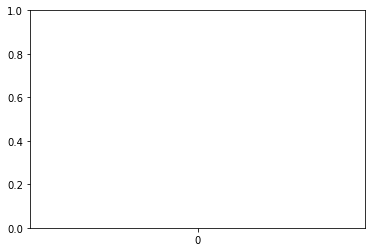

In [24]:
COL = "Seat comfort"
# Names of group and bar width
names = ['0','1','2','3','4', '5']
r = names
bars1 = df_train.loc[df_train['satisfaction'] == "satisfied"].groupby([COL]).size()
bars2 = df_train.groupby([COL]).size()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='green', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='darkred', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.title(COL)
 
# Show graphic
plt.show()

<AxesSubplot:xlabel='Seat comfort'>

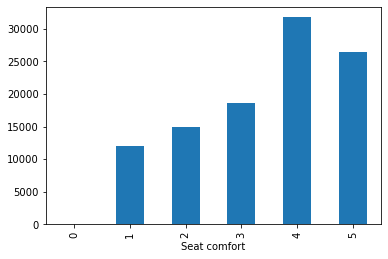

In [25]:
df_train.groupby([COL]).size().plot(kind='bar') 

<AxesSubplot:xlabel='Seat comfort'>

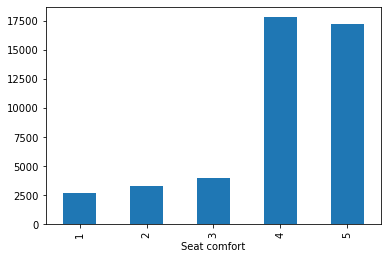

In [26]:
df_train.loc[df_train["satisfaction"] == "satisfied"].groupby([COL]).size().plot(kind='bar') 

<AxesSubplot:xlabel='Seat comfort'>

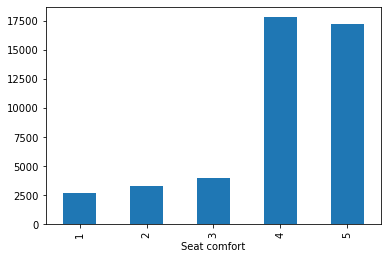

In [27]:
df_train.loc[df_train["satisfaction"] == "satisfied"].groupby([COL]).size().plot(kind='bar') 